### Mini Project 
Ludovica, Inés, Andrew

In [36]:
with open('../out.moreno_health_health', 'rb') as infile:
    data = infile.read()
    
#data

In [37]:
new_data = str(data).split('\\n')
list_ = [[]]*len(new_data[2:-1])
for i in range(len(new_data[2:-1])):
    list_[i] = new_data[2+i].split(' ')

len(list_)

12969

In [30]:
import networkx as nx

In [56]:
G = nx.DiGraph()

for lst in list_:
    G.add_edge(lst[0], lst[1], weight=float(lst[2]))
    
len(G)

2539

In [41]:
nx.write_gexf(G, "./saved_graph")

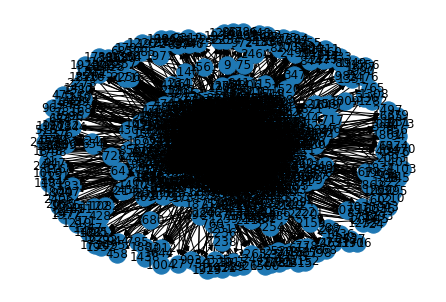

In [35]:
nx.draw(G, with_labels = True) 

#### Exercise 2
Given your knowledge of network analysis a school principal has approached you with the following query: "Given the current outbreak of Covid-19 we would like to secure our school. What could we do?". Use your knowledge to think about possible answers to the school principal. 

Write a short report (max 2 pages with pictures) in which you: 

(a) (2 points) Formalise the question you want to answer. The question the school principal asked is very vague. Try to make it formal enough to be studied using network theory. State the question clearly and explain why you think an answer to your question would be relevant.

(b) (6 points) Use one of the measures you have seen in the previous classes to answer the question. After you formalised your idea run some tests (you can use Python and/or Gephi) and write your endings. Make sure to present your data in a nice and understandable way. Gephi rendered graphs are welcome.

#### Question Formalisation

- evaluate whether degree centrality influences the spread of the virus
- model how fast it spreads with and without the most popular people

Measures for how fast it spreads:
- average path length
- how connected the graph is
- clustering coefficient

In [43]:
nx.average_shortest_path_length(G)

5.332392145105309

In [52]:
deg_centrality = nx.degree_centrality(G)

In [55]:
G_ = G.copy()
list_nodes = G.nodes()

for node in list_nodes:
    if deg_centrality[node] > 0.01:
        G_.remove_node(node)
        
len(G_)

2513

In [57]:
nx.average_shortest_path_length(G_)

5.406478350792439

In [46]:
nx.betweenness_centrality(G)

{'1': 0.00044634498750549604,
 '2': 0.0007051103951252551,
 '3': 0.0019257338201296732,
 '4': 0.00031116715515248694,
 '5': 0.001165002891483647,
 '6': 0.00212690168043728,
 '7': 0.00028039174172083114,
 '8': 0.0,
 '9': 0.0020940948810326703,
 '10': 0.004121289955945861,
 '11': 0.00265047831560494,
 '12': 0.0006601116627000361,
 '13': 0.0025506631041203667,
 '14': 0.0010644598800606643,
 '15': 0.004187707328122404,
 '16': 0.0023626050127741683,
 '17': 0.002886987531495373,
 '18': 0.0,
 '19': 0.002317134405587609,
 '20': 0.002671360081145009,
 '21': 0.0026567568875577236,
 '22': 0.00299448444132212,
 '23': 0.0013497681536396454,
 '24': 0.003079283519737941,
 '25': 0.002027177796785992,
 '26': 0.001550592842492917,
 '27': 0.0,
 '28': 0.0,
 '29': 0.0015685108712578224,
 '30': 0.0006385627397111194,
 '31': 0.0,
 '32': 0.0017036491110303306,
 '33': 0.004523113691383056,
 '34': 0.006215116941175662,
 '35': 0.0021062267786270744,
 '36': 0.0005965569740302073,
 '37': 0.004430525930409838,
 '38

In [47]:
nx.eigenvector_centrality(G)

{'1': 0.00011899265091766501,
 '2': 6.67762957251378e-05,
 '3': 6.314480384463204e-05,
 '4': 0.0001959619125733881,
 '5': 0.00023242273731009588,
 '6': 0.0006706577296474664,
 '7': 2.96123073903777e-07,
 '8': 0.0003596692901650569,
 '9': 6.823921007174991e-05,
 '10': 8.838079478471949e-05,
 '11': 0.00023641739381968433,
 '12': 4.3968818722989134e-05,
 '13': 8.979454772542284e-05,
 '14': 5.012670080439142e-05,
 '15': 0.00038861137757586545,
 '16': 0.00037721435907639986,
 '17': 0.0006130438949833549,
 '18': 0.0001467909779057772,
 '19': 0.0002999981467793769,
 '20': 0.0008479058954071706,
 '21': 0.0002125749586150041,
 '22': 0.00023945938550034483,
 '23': 0.00025770980496745013,
 '24': 0.0003192426959970517,
 '25': 7.837969429009386e-05,
 '26': 6.2011476333789084e-06,
 '27': 6.873457687642315e-05,
 '28': 5.943193454456971e-06,
 '29': 4.074605305226489e-06,
 '30': 2.8517912641868534e-06,
 '31': 6.160396814876218e-06,
 '32': 1.6054970141079374e-05,
 '33': 4.1447476611639286e-05,
 '34': 5.

In [50]:
degrees = []
for node in G.nodes():
    degrees.append(G.degree(node))
    
max(degrees)

36

In [51]:
min(degrees)

1